In [1]:
import pandas as pd
import numpy as np
import keras.backend.tensorflow_backend as K
from sqlalchemy import create_engine
from keras.models import Model
from keras.layers import Dense, Embedding, Input, LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.model_selection import train_test_split

C:\Users\leesoojin\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt

In [5]:
data_tok.head()

,NO,CONTENT_TOK,CATEGORY
0,1,바다 찌낚 미야케 지마 조행 스압 바다 찌낚 미야케 지마 조행 내용 짧 .. 편의 ...,1
1,2,나 왜 여기 결혼식 후기 예전 남 다 똑같 결혼식 싫 분위기 예식장 하우스 웨딩 소...,1
2,3,초스압 데이터 주의 년 전 만화 출판 형식 작업 해서 웹 느낌 많이 다르 시간 조금...,0
3,4,씹 스압 바린 일본 투어 편 https 편 https 편 https 편 https ...,1
4,5,자작 드래곤볼 여 캐 댄스 커버 자작 드래곤볼 여 캐 댄스 커버 오랜만 다음 영상 ...,0


In [6]:
data_tok.shape

(734402, 3)

In [8]:
data_tok.head()

,NO,CONTENT_TOK,CATEGORY
0,690194,던질 ㅋㅋ ㅋㅋ 크 ㅋㅋ,0
1,29727,표창원 .. .. 총경 힘 ㄷㄷ .. 년 당시 윤모 총경 강남 바닥 전체 유흥 단속...,0
2,93790,니 좋 빨갱이 이제 유효 기일 끝 나간다 북미 정상회담,0
3,139927,병신 여기 와서 고생 한다 ㅋㅋ ㅋㅋ,1
4,174921,기회 준용 과정 준용 결과 준용 문 준용 형사 처벌 무조건 면제 ?,0


In [9]:
X = data_tok.CONTENT_TOK
y = data_tok.CATEGORY

In [10]:
y[:5]

0    0
1    0
2    0
3    1
4    0
Name: CATEGORY, dtype: object

In [11]:
num_words = 20000
max_len = 200
emb_size = 128

In [12]:
tok = Tokenizer(num_words = num_words)
tok.fit_on_texts(list(X))

In [13]:
X = tok.texts_to_sequences(X)

In [14]:
X[0]

[9484, 1, 1, 16, 1]

In [15]:
X = sequence.pad_sequences(X, maxlen = max_len)

In [16]:
X[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [20]:
model = model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 200, 128)          2560000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200, 120)          90720     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 120)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                6050      
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
__________

In [22]:
with K.tf_ops.device('/device:GPU:0'):
    hist = model.fit(X_train, y_train, batch_size = 512, epochs = 10, validation_split = 0.2, callbacks = [checkpoint, early_stop])

Train on 470016 samples, validate on 117505 samples
Epoch 1/10
470016/470016 [==============================] - 513s 1ms/step - loss: 0.0867 - acc: 0.9719 - val_loss: 0.0365 - val_acc: 0.9928

Epoch 00001: val_loss improved from inf to 0.03651, saving model to ./model_checkpoint/clean.model
Epoch 2/10
470016/470016 [==============================] - 527s 1ms/step - loss: 0.0365 - acc: 0.9929 - val_loss: 0.0373 - val_acc: 0.9929

Epoch 00002: val_loss did not improve from 0.03651
Epoch 3/10
470016/470016 [==============================] - 562s 1ms/step - loss: 0.0285 - acc: 0.9933 - val_loss: 0.0408 - val_acc: 0.9929

Epoch 00003: val_loss did not improve from 0.03651


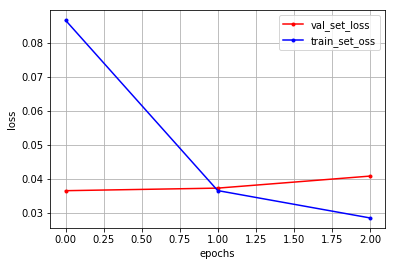

In [23]:
y_vloss = hist.history['val_loss']
y_loss = hist.history['loss']

x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='.', c='red', label='val_set_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='train_set_oss')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()

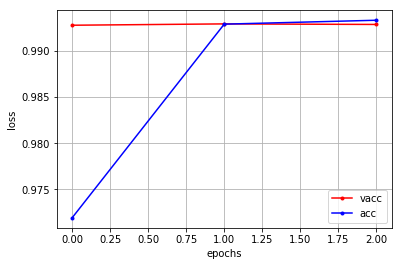

In [24]:
vacc = hist.history['val_acc']
acc = hist.history['acc']

x_len = np.arange(len(vacc))

plt.plot(x_len, vacc, marker='.', c='red', label='vacc')
plt.plot(x_len, acc, marker='.', c='blue', label='acc')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()
plt.show()